<a href="https://colab.research.google.com/github/ProtossDragoon/Deep-Learning-with-Python/blob/main/chapter2_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%98%EC%88%98%ED%95%99%EC%A0%81%EA%B5%AC%EC%84%B1%EC%9A%94%EC%86%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 작성 : 2020/10/03

- 이 notebook 은 SAI I Team 의 '케라스 창시자에게 배우는 딥러닝' 스터디 참고/멘토링 자료 목적으로 제작되었습니다.
- 이 notebook 을 학습하고자 할 때, 해당 주차의 책을 모두 공부한 후 따라가는 것을 매우 추천합니다.
- 이 코드와 주석에 설명되어있지 않다고 중요하지 않은 내용인 것은 아닙니다. 반드시 책을 선행해 주세요.
- 제작자 github : https://github.com/ProtossDragoon
- 질문 올리는 곳 : 
- 2020년 SAI 동아리원분들께서는, https://github.com/sju-coml/SAI-2020-Team-I/issues 에 질문을 올려주세요.
- contact : dlwkdgn1@naver.com / dlwkdgn3@gmail.com

# 신경망과의 첫 만남

In [ ]:
import tensorflow.keras as keras # 어느 순간부터, keras 는 tensorflow 라는 거대한 프레임워크 안에 포함되어 있습니다.

In [ ]:
from keras.datasets import mnist

# 데이터를 쉽게 다운로드받을 수 있도록 Keras 에서 미리 소스코드로 준비해 두었습니다.
# mnist dataset 은 최근 연구에도 활발히 사용되는 데이터셋이기 때문이지요!
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print('training data')
print(train_images.shape)
print(train_labels.shape)

print('-----')

print('test data')
print(test_images.shape)
print(test_labels.shape)

print('test data 5 preview :', test_labels[:5], '...')

training data
(60000, 28, 28)
(60000,)
-----
test data
(10000, 28, 28)
(10000,)
test data 5 preview : [7 2 1 0 4] ...


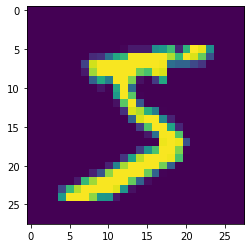

label of this image :  5


In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_images[0])
plt.show()
print('label of this image : ', train_labels[0])

In [ ]:
from keras import models
from keras import layers

network  = models.Sequential() # Sequantial 한 방식으로, network 의 layer 을 쌓아 볼 것입니다. Sequantial 하지 않은 방식으로는 Functional 한 방식이 있는데, 지금은 이해하지 맙시다!

# 반드시 반드시! https://keras.io/ko/getting-started/sequential-model-guide/ 를 눌러 보기라도 합시다. 실제로는, 이러한 문서를 보고 작성해야 합니다!
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

## 꼰대질

### 아직 python 을 공부한다고 "문법" 공부만 하는 고3 같은 분들에게.
언어의 문법은 이러한 내용을 이해하는 데 도움을 줄 뿐입니다.
- network.compile() 에서 network 은 무슨 클래스의 변수일까?
- network.compile() 에서 compile() 은 함수이다. 그렇다면, parameter 로 넘기는 optimizer = 'rmsprop' 는 무슨 뜻일까?
- a = network.compile() 을 하지 않는 이유는 무엇일까?

<br>

### API 문서 연습하기.
아래 질문들에 대한 답을 스스로 찾아 봅시다.
- 왜 metrics 에 list 를 대입해야 하는가?
- 왜 metrics 에 string 을 넘겨주고 있을까?
- string 으로 표현할 수 있는 metrics 만으로 부족하다면, 무엇을 보아야 할까?
- output 이 여러 개라면, list type 가 아닌 다른 datatype (class) 변수를 metric 에 대입할 수 있는가?

<br>

### 실제 API 문서 내용.
metrics: **List of metrics** to be evaluated by the model during training
      and testing. **Each of this can be a string (name of a built-in
      function)**, function or a tf.keras.metrics.Metric instance. **See
      tf.keras.metrics.** Typically you will use metrics=['accuracy']. A
      function is any callable with the signature result = fn(y_true,
      y_pred). To specify different metrics for different outputs of a
      multi-output model, you could also pass a dictionary, such as
        metrics={'output_a': 'accuracy', 'output_b': ['accuracy', 'mse']}.
          You can also pass a list (len = len(outputs)) of lists of metrics
          such as metrics=[['accuracy'], ['accuracy', 'mse']] or
          metrics=['accuracy', ['accuracy', 'mse']]. When you pass the
          strings 'accuracy' or 'acc', we convert this to one of
          tf.keras.metrics.BinaryAccuracy,
          tf.keras.metrics.CategoricalAccuracy,
          tf.keras.metrics.SparseCategoricalAccuracy based on the loss
          function used and the model output shape. We do a similar
          conversion for the strings 'crossentropy' and 'ce' as well.

In [ ]:
from keras.utils import to_categorical

train_labels_categorized = to_categorical(train_labels)
test_labels_categorized = to_categorical(test_labels)

print(train_labels_categorized.shape, '->', train_labels.shape)
print(test_labels_categorized.shape, '->', test_labels.shape)
print('-----')

print('train labels')
print(train_labels[0], '->', train_labels_categorized[0])

(60000, 10) -> (60000,)
(10000, 10) -> (10000,)
-----
train labels
5 -> [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


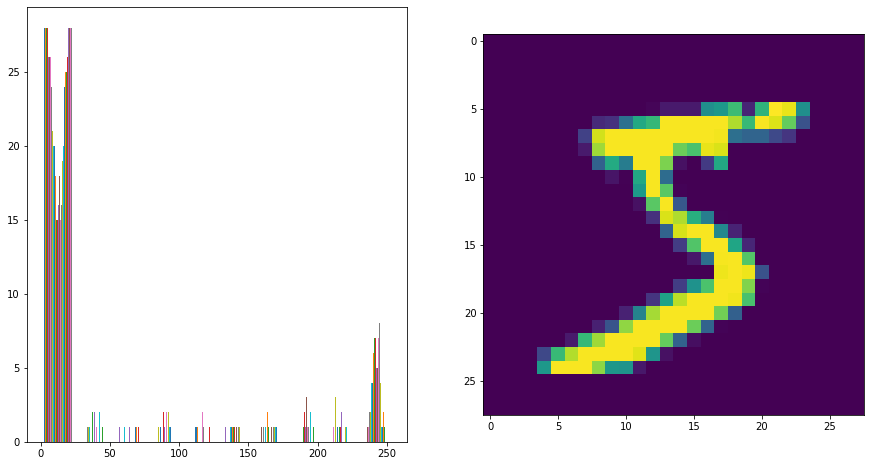

In [ ]:
plt.figure(figsize = [15,8])

plt.subplot(1,2,1)
plt.hist(train_images[0]) # 이 5 라는 이미지의 픽셀값들이 가지는 값들이 어느 범위에 분포해 있는지 봅시다.

plt.subplot(1,2,2)
plt.imshow(train_images[0])
plt.show()

(60000, 28, 28) -> (60000, 784)
(10000, 28, 28) -> (10000, 784)
-----


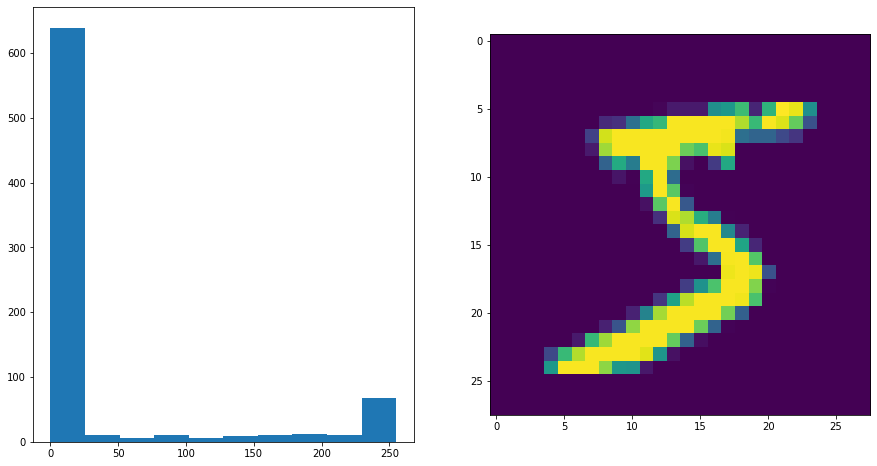

In [ ]:
train_images_reshaped            = train_images.reshape((60000, 28*28))
test_images_reshaped             = test_images.reshape((10000, 28*28))

print(train_images.shape, '->', train_images_reshaped.shape)
print(test_images.shape, '->', test_images_reshaped.shape)
print('-----')

plt.figure(figsize = [15,8])

plt.subplot(1,2,1)
plt.hist(train_images_reshaped[0]) # 이 5 라는 이미지의 픽셀값들이 가지는 값들이 어느 범위에 분포해 있는지 봅시다. 아까와는 다르게, x 축의 범위가 0에서 1 사이겠지요?

plt.subplot(1,2,2)
plt.imshow(train_images_reshaped[0].reshape(28,28))
plt.show()

In [ ]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network.fit(train_images_reshaped, train_labels_categorized, epochs = 5, batch_size = 128)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 5.2851 - accuracy: 0.8982
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.6627 - accuracy: 0.9520
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.4682 - accuracy: 0.9639
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.3477 - accuracy: 0.9722
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.3243 - accuracy: 0.9763


In [ ]:
test_loss, test_acc = network.evaluate(test_images_reshaped, test_labels_categorized)

313/313 [==============================] - 1s 2ms/step - loss: 0.6515 - accuracy: 0.9638


## 정규화하고 학습시키기
- 엥? 왜 255 로 나누는 거죠? 하는 사람이 혹시나 있을까봐.
- 이론상으로는 더 "효율적으로 학습된다" 라는 것을 들어 본 사람은 있을 것입니다.
- 위에서는, 정규화 과정 (255 로 나누는 과정) 이 없어도 학습은 된다 라는 것을 보여주었고 아래에서는, 정규화로 학습하는 과정을 보여 줍니다.
- 255 로 나누면 더 "학습이 빠르고 안정적으로" 이루어질 수 있습니다.
- 어떤 근거로 이렇게 이야기했는지는, 차차 알게 될 것입니다. 지금은 큰 그림을 위해 무시합시다.

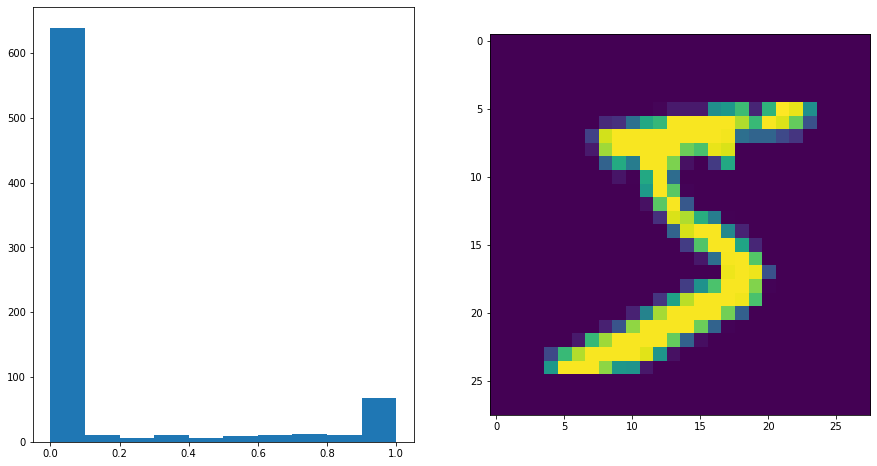

In [ ]:
train_images_reshaped_scaled = train_images_reshaped.astype('float32') / 255 # 위 그래프에 보이듯 0~255 의 범위에 있지요. 이를 0~1 의 범위로 축소시켜 주도록 합니다.
test_images_reshaped_scaled  = test_images_reshaped.astype('float32') / 255

plt.figure(figsize = [15,8])

plt.subplot(1,2,1) 
plt.hist(train_images_reshaped_scaled[0]) # 이 5 라는 이미지의 픽셀값들이 가지는 값들이 어느 범위에 분포해 있는지 봅시다. 아까와는 다르게, x 축의 범위가 0에서 1 사이겠지요?

plt.subplot(1,2,2)
plt.imshow(train_images_reshaped_scaled[0].reshape(28,28)) # x 의 범위가 어떻게 표현이 되어있든, imshow() 는 x 의 범위를 적절히 이해하고 (0~1 float 로 인코딩 되어있는지, 0~255  int 로 인코딩 되어있는지 판단) 그림을 그려 줍니다.
plt.show()

In [ ]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network.fit(train_images_reshaped_scaled, train_labels_categorized, epochs = 5, batch_size = 128)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1666 - accuracy: 0.9594
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0713 - accuracy: 0.9790
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0485 - accuracy: 0.9851
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0344 - accuracy: 0.9898
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0257 - accuracy: 0.9928


In [ ]:
test_loss, test_acc = network.evaluate(test_images_reshaped_scaled, test_labels_categorized)

313/313 [==============================] - 0s 2ms/step - loss: 0.0585 - accuracy: 0.9830


## 학습된 모델 사용해 보기

(784,)
(1, 784)
예측 결과 :  7


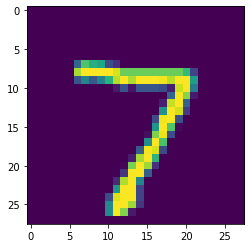

In [ ]:
# 이 학습된 것을 어떻게 사용할 수 있을까
print(test_images_reshaped_scaled[0].shape)
print(test_images_reshaped_scaled[0].reshape(1, 28*28).shape)
answer = network.predict(test_images_reshaped_scaled[0].reshape(1, 28*28))
print('예측 결과 : ', answer.argmax())
plt.figure()
plt.imshow(test_images_reshaped_scaled[0].reshape(28, 28))

# 신경망을 위한 데이터표현
- dimension, axis, shape,
- dtype

In [ ]:
import numpy as np
x = np.array(12)
print('데이터 :', x)
print('데이터의 모양 :', x.shape)
print('데이터의 diension, 또는 axis, 또는 rank :', x.ndim)

데이터 : 12
데이터의 모양 : ()
데이터의 diension, 또는 axis, 또는 rank : 0


### 중요한 notation
- 차원 (dimension) 을 축 (axis) 이라고도 한다.
- tensor 의 축 개수 (axis) 를 rank 라고 한다. (이때, 선형대수-행렬 에서 span 과 관련된 rank 와는 다른 의미!)

In [ ]:
x = np.array([12, 3, 6, 14, 7])
print('데이터 :', x)
print('데이터의 모양 :', x.shape)
print('데이터의 diension, 또는 axis, 또는 rank :', x.ndim) # vector, 1D tensor
print('자료형 :', x.dtype)

데이터 : [12  3  6 14  7]
데이터의 모양 : (5,)
데이터의 diension, 또는 axis, 또는 rank : 1
자료형 : int64


In [ ]:
x = np.array([[12, 30, 63, 14, 7], [18, 31, 62, 14, 7], [12, 32, 61, 10, 8]])
print('데이터 :\n', x)
print('데이터의 모양 :', x.shape)
print('데이터의 diension, 또는 axis, 또는 rank :', x.ndim) #  5D matrix (선형대수에서는 열벡터의 개수), 2D tensor
print('자료형 :', x.dtype)

데이터 :
 [[12 30 63 14  7]
 [18 31 62 14  7]
 [12 32 61 10  8]]
데이터의 모양 : (3, 5)
데이터의 diension, 또는 axis, 또는 rank : 2
자료형 : int64


In [ ]:
x = np.array([[[12, 30, 63, 14, 7], [18, 31, 62, 14, 7], [12, 32, 61, 10, 8]], [[12, 30, 63, 14, 7], [18, 31, 62, 14, 7], [12, 32, 61, 10, 8]]])
print('데이터 :\n', x)
print('데이터의 모양 :', x.shape)
print('데이터의 diension, 또는 axis, 또는 rank :', x.ndim) #  3D tensor
print('자료형 :', x.dtype)

데이터 :
 [[[12 30 63 14  7]
  [18 31 62 14  7]
  [12 32 61 10  8]]

 [[12 30 63 14  7]
  [18 31 62 14  7]
  [12 32 61 10  8]]]
데이터의 모양 : (2, 3, 5)
데이터의 diension, 또는 axis, 또는 rank : 3
자료형 : int64


이제 우리가 실습 코드로 작성했던 train_images 라는 변수에 들어 있는 이미지 데이터가 어떤 모습으로 변해가는지에 대한 내용을 다시 맨 위로 올라가 잘 생각해 봅시다.

## 텐서 슬라이싱

In [ ]:
# 이미지 변수의 0번째 축 : 이미지의 번호 (첫 번째 축(axis, dimension, rank) 이므로 배치 축 (batch dimension, sample dimension) 라고 생각할 수 있겠지요.)
# 이미지 변수의 1번째 축 : n 번째 이미지의 행
# 이미지 변수의 2번째 축 : n 번째 이미지의 열

# 아래 두 표현은 동일함
print(train_images[10:100].shape)
print(train_images[10:100, : , : ].shape)

(90, 28, 28)
(90, 28, 28)


### 텐서의 실제 사례

- 벡터 데이터에서는 (배치, 특징)
- 시계열 데이터에서는 (배치, 시간, 특징)
- 이미지 데이터에서는 (배치, 세로축(행) 특징, 가로축(열) 특징, (RGB따위의)채널) : tensorflow 와 같은 프레임워크에서, channel last 라고 함.
- 이미지 데이터에서는 (배치, (RGB따위의)채널, 세로축(행) 특징, 가로축(열) 특징) : pytorch 와 같은 프레임워크에서, channel first 라고 함.
- 동영상 데이터에서는 (배치, 시간, 세로축(행) 특징, 가로축(열) 특징, (RGB따위의)채널) : tensorflow 와 같은 프레임워크에서, channel last 라고 함.
- 동영상 데이터에서는 (배치, 시간,  (RGB따위의)채널, 세로축(행) 특징, 가로축(열) 특징) : pytorch 와 같은 프레임워크에서, channel first 라고 함.

이것은 convention 일 뿐, 데이터를 어떻게 해석하느냐에 따라서 각 축의 의미는 달라집니다! 하지만 대부분의 연구들이 저러한 방식으로 데이터를 가공하고 처리하기 때문에, 반드시 숙지하고 있어야 합니다. 차차 익숙해질 것이라고 생각합니다.

(60000, 28, 28)
(13, 13)


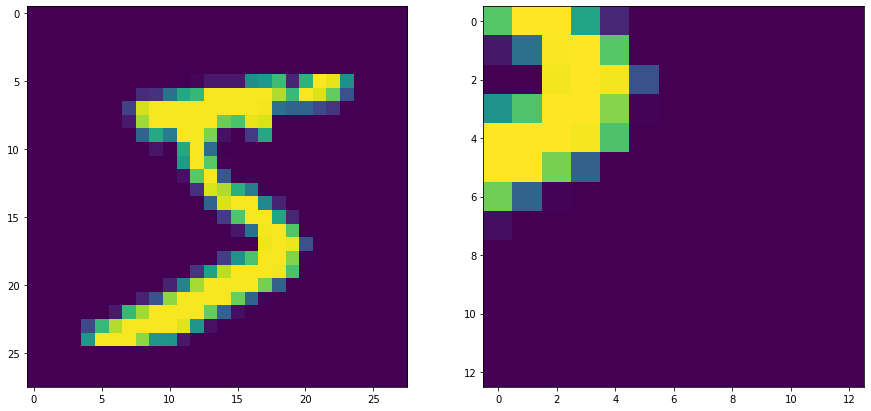

In [ ]:
# 0번째 이미지를 가지고 가공해 봅시다.
print(train_images[0  : , : ].shape)
print(train_images[0, 15: , 15: ].shape)

# 이미지 하나의 행과 열은, 행렬(Matrix) 처럼 왼쪽 위가 원점입니다.
plt.figure(figsize = [15,8])
plt.subplot(1,2,1)
plt.imshow(train_images[0])
plt.subplot(1,2,2)
plt.imshow(train_images[0, 15:, 15:])

# 신경망의 톱니바퀴 : 텐서 연산 (tensor ops)

In [ ]:
# elementwise operation : 원소 별 연산.
# 앞으로 배울 내용들을 살펴보면, 원소별로 연산하지 않고, 채널을 단위로 연산하거나 하는 경우가 있습니다.
# 당연히 원소끼리 연산하는거지 ㅡ.ㅡ 하는 의문이 있을까봐 첨언합니다.

def relu_vector(x) : # batch 가 있는 vector 데이터 : (배치, 특징) 일 때에만 작동하는 함수이기 때문에 이름을 바꿈.
  # assert len(x.shape) == 2 # 이 코드는, input 으로 이상한 값이 들어오지 않도록 제한해주는 코드일 뿐입니다.
  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] = max(x[i, j], 0)
  return x

def add_vector(x, y) :
  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] = x[i, j] + y[i, j]
  return x

# 우리가 이런 것들을 실제로 만들어 사용하지 않는 이유는, numpy 라는 친구가 엄청나게 빠른 속도를 자랑하기 때문입니다.
# tensorflow 에서 relu 와 같은 레이어, add 와 같은 연산자들은 결국 numpy 와 같은 친구들로 바꾸어서 하드웨어적으로 최적화되도록 계산해서 우리가 만들어 쓰는 함수보다 빠를 수 있습니다.

In [ ]:
vector1 = np.array([[-2, -1, 0, 1, 2, 3], [-20, -10, 0, 10, 20, 30]])
vector2 = np.array([[-3, -1, 0, 1, 3, 5], [-15, -5, 0, 15, 16, 17]])

answer = relu_vector(vector1)
print(vector1, '\n->\n', answer)

print('\n----\n')

answer = relu_vector(vector2)
print(vector2, '\n->\n', answer)

[[ -2  -1   0   1   2   3]
 [-20 -10   0  10  20  30]] 
->
 [[ 0  0  0  1  2  3]
 [ 0  0  0 10 20 30]]

----

[[ -3  -1   0   1   3   5]
 [-15  -5   0  15  16  17]] 
->
 [[ 0  0  0  1  3  5]
 [ 0  0  0 15 16 17]]


In [ ]:
answer = add_vector(vector1, vector2)
print(answer)

[[ -5  -2   0   2   5   8]
 [-35 -15   0  25  36  47]]


In [ ]:
answer = relu_vector(add_vector(vector1, vector2))
print(answer)

[[ 0  0  0  2  5  8]
 [ 0  0  0 25 36 47]]


In [ ]:
# numpy 를 활용하면 이렇게 코드를 절약할 수 있겠지요.
# numpy 자료형의 벡터와 numpy 자료형의 벡터 사이에서 + 연산은, vector 합으로 자동적으로 처리됩니다.
answer = np.maximum(vector1 + vector2, 0)
print(answer)

[[ 0  0  0  2  5  8]
 [ 0  0  0 25 36 47]]


### 브로드캐스팅

In [ ]:
tensor1 = np.random.random((5,4,3))
vector3 = np.random.random((4,3))


print(tensor1.shape)
print(vector3.shape)
print(tensor1 + vector3) # 더해지면 안되는건데 더해짐.

(5, 4, 3)
(4, 3)
[[[1.1376763  1.05497201 0.81407178]
  [1.44092513 1.52225968 1.13720322]
  [0.74501039 1.16060411 0.67721988]
  [0.56475009 1.14707196 1.13633278]]

 [[1.35025367 0.69186932 1.03771429]
  [0.83592969 1.60394599 1.25475727]
  [0.66215324 1.02369619 1.20515787]
  [1.28857956 1.1030552  1.6737058 ]]

 [[1.48249115 0.99035222 0.57224948]
  [1.75437669 1.72436472 1.31630929]
  [0.8444174  1.47714867 0.37181376]
  [0.77615635 0.52106951 1.79937224]]

 [[1.39816608 0.82490622 0.58884612]
  [1.42869632 1.53077614 1.40278317]
  [0.51121263 0.93876191 0.61308498]
  [0.46888091 1.01921092 1.17851818]]

 [[1.20889126 0.21676753 1.19964586]
  [1.65305845 1.82366366 1.14671359]
  [0.33383294 1.87456806 0.88585457]
  [0.60912893 0.57962443 0.90174236]]]


In [ ]:
tensor1 = np.random.random((2, 5,4,3))
vector3 = np.random.random((4,3))


print(tensor1.shape)
print(vector3.shape)
print(tensor1 + vector3) # 더해지면 안되는건데 더해짐.

(2, 5, 4, 3)
(4, 3)
[[[[1.30169    1.85573049 0.74860224]
   [1.36894696 0.69306449 0.96917198]
   [1.10228925 1.04296546 1.15360094]
   [0.45031413 0.5649066  0.92186004]]

  [[0.82564891 1.75606826 0.65555672]
   [0.76340672 1.12192461 1.2124471 ]
   [1.59875186 1.66984771 1.06298503]
   [0.89197474 0.79979654 0.43391686]]

  [[0.76817543 1.61869349 0.59185564]
   [0.77963862 0.60855628 0.64870608]
   [1.30682201 1.20298999 1.80778487]
   [0.58001108 0.83195679 0.92689582]]

  [[0.61297029 1.02058315 0.55959555]
   [1.19155279 1.0175426  0.77544877]
   [1.00997903 0.96082225 1.57334507]
   [1.07131531 0.48288264 1.36107282]]

  [[0.46610387 1.58802923 1.13539979]
   [0.56071253 0.98353563 1.17101737]
   [1.47253182 1.33887408 1.01277725]
   [1.14562724 0.51308198 1.12580808]]]


 [[[0.74362143 1.68942356 0.52335879]
   [1.37653755 1.14168504 0.51427558]
   [1.13366504 1.34178656 1.0270249 ]
   [1.34259805 1.30000408 1.35269985]]

  [[1.29106429 1.09396085 0.59123583]
   [1.08203026 0

### 아직 안 와닿으시는 분들께

텐서 슬라이싱, 텐서의 축, 브로드캐스팅... 너무 많고 자잘한 것 같습니다. 인공지능을 배우고자 했는데 이상한 것을 공부하는 느낌이랄까? 너무 사소하게 느껴지곤 하지요. 이걸 왜 해야 하는건지, 잘 모르겠다고 생각하는 경우가 있습니다. 저 또한 그랬고, 지금도 사실 이걸 해야하는지는 잘 모릅니다. 하지만, 분명한 것은 많이 사용된다는 것입니다. 아래에서 간단한 예를 들어 드릴 것입니다. 처음에는 어려운 예일 수 있으니, 나중에 실력이 향상되어 다시 본다면 크게 실력향상을 도울 수 있는 예시일 것입니다!


브로드캐스팅으로 예를 들어 보겠습니다. 이러한 브로드캐스팅은 꽤나 자주 이용되는 편입니다. 나중에는, YOLO v1 이라는 신기한 모델을 구현해보는 시간을 가질 것인데, 거기의 코드 일부를 발췌해 보겠습니다. (발췌된 코드이기 때문에 실제로 실행이 되지는 않습니다.) 나중에 여러분의 실력이 쌓였을 때, 다시 돌아와보도록 합시다!

In [ ]:
def loss(y_true, y_pred):

  # .... 초략

    box_mask = K.expand_dims(box_mask)                # 예측값 : ? * 7 * 7 * 2 * 1 # 각 cell 의 box 들과 정답의 iou 중에 가장 높은 애들의 위치에만 1 이 표시된 mask. 각 원소들에 대한 하나의 차원이 더 싸여 있다.
    response_mask = K.expand_dims(response_mask)      # 정답값 : ? * 7 * 7 * 1 * 1

    box_loss = 5 * box_mask * response_mask * K.square((label_xy - predict_xy) / 448)
    # 해설
    # 5 : 그냥 람다
    # box_mask * response_mask : 내가 관심있는 부분 (1obj)
    # K.square((label_xy - predict_xy) / 448) : 해당 grid 가 맡고 있는 구역에서 regression 한 값들의 차를 0~1 범위로 regularization 하고 square
    # 정리하면, 정답값 물체가 존재하는 부분은 1이고 없는부분은 0이니까, 해당 grid 중, 예측값이랑 실제 물체 존재여부가 일치하는 곳에 대해서만 연산하여 loss 로 더해주겠다는 뜻.
    box_loss += 5 * box_mask * response_mask * K.square((K.sqrt(label_wh) - K.sqrt(predict_wh)) / 448)
    box_loss = K.sum(box_loss)


  # .... 하략

In [ ]:
# Loss 전체 코드가 궁금하신 분들을 위해 https://www.maskaravivek.com/post/yolov1/ 에서 구현된 코드를 준비했습니다.
# 지금 이것을 이해할 필요는 없고, 위 코드 조각에서 보이듯, 브로드캐스팅이 실제로 쓰이기는 하는구나... 를 느끼시면 됩니다.
# 그래도 궁금하시면, 코드를 조금 훑어보세요. 텐서의 슬라이싱, 텐서의 축 (axis) 과 차원 (dimension) 이 모두 녹아 있다는 것을 알 수 있습니다.
# 누가 이 사실을 조금만 더 빨리 알려줬더라면, 저도 발전이 더 빨랐을 텐데요 :)
                                                 
def yolo_loss(y_true, y_pred):
    
    # 정답
    # 정답을 보관하고 있는 label_matrix 는 [0:25] 까지밖에 없었지.
    label_class   = y_true[..., :20]              # ? * 7 * 7 * 20
    label_box     = y_true[..., 20:24]            # ? * 7 * 7 * 4
    response_mask = y_true[..., 24]               # ? * 7 * 7
    response_mask = K.expand_dims(response_mask)  # ? * 7 * 7 * 1

    # 추론
    # 결과값은 [0:(C+5B)] 즉, [0:30] 의 채널을 가지고 있음.
    predict_class = y_pred[..., :20]      # ? * 7 * 7 * 20
    predict_trust = y_pred[..., 20:22]    # ? * 7 * 7 * 2   *여기서 predict_trust 는 confidence 를 의미하는 것일 것이다.
    predict_box   = y_pred[..., 22:]      # ? * 7 * 7 * 8


    # 저기서 [-2] 의 위치의 채널 둘을 비교해서, "딱 맞는" bbox localization 결과물과 정답을 비교하려고 모양 변경
    _label_box = K.reshape(label_box, [-1, 7, 7, 1, 4])     # batch * S * S * 1    * wywh
    _predict_box = K.reshape(predict_box, [-1, 7, 7, 2, 4]) # batch * S * S * bbox * xywh


    # 정답
    # x와 y에 대한 localization / w과 h에 대한 localization 식이 다름. 둘의 채널(?) 을 분리시켜 줌.
    label_xy, label_wh = yolo_head(_label_box)  # ? * 7 * 7 * 1 * 2, ? * 7 * 7 * 1 * 2
    label_xy = K.expand_dims(label_xy, 3)       # ? * 7 * 7 * 1 * 1 * 2
    label_wh = K.expand_dims(label_wh, 3)       # ? * 7 * 7 * 1 * 1 * 2
    # 각 grid cell 이 (xmin,ymin), (xmax,ymax) 값을 담고 있는 상태로 변경
    label_xy_min, label_xy_max = xywh2minmax(label_xy, label_wh)  # ? * 7 * 7 * 1 * 1 * 2, ? * 7 * 7 * 1 * 1 * 2

    # 추론
    # x와 y에 대한 localization / w과 h에 대한 localization 식이 다름. 둘의 채널(?) 을 분리시켜 줌.
    predict_xy, predict_wh = yolo_head(_predict_box)  # ? * 7 * 7 * 2 * 2, ? * 7 * 7 * 2 * 2
    predict_xy = K.expand_dims(predict_xy, 4)         # ? * 7 * 7 * 2 * 1 * 2
    predict_wh = K.expand_dims(predict_wh, 4)         # ? * 7 * 7 * 2 * 1 * 2
    # 각 grid cell 이 (xmin,ymin), (xmax,ymax) 값을 담고 있는 상태로 변경
    predict_xy_min, predict_xy_max = xywh2minmax(predict_xy, predict_wh)  # ? * 7 * 7 * 2 * 1 * 2, ? * 7 * 7 * 2 * 1 * 2


    iou_scores = iou(predict_xy_min, predict_xy_max, label_xy_min, label_xy_max)  # ? * 7 * 7 * 2(박스1개당 iou1개) * 1 # 아아.. iou 를 계산하면 맨 뒷 채널이 날라가서, expand 를 한 번 더 했구나.. 하는 깨달음도 함께.
    best_ious = K.max(iou_scores, axis=4)                # ? * 7 * 7 * 2 (box2개)  # 어차피 맨 뒷채널은 iou 라 1개인데 그냥 채널 하나 없애는 효과. squeeze 와 뭐가 다른지는 잘 모르겠지만.
    best_box  = K.max(best_ious, axis=3, keepdims=True)  # ? * 7 * 7 * 1           # 각 cell 마다 가장 높은 iou 값 하나만 따로 저장

    box_mask = K.cast(best_ious >= best_box, K.dtype(best_ious))  # ? * 7 * 7 * 2 # 각 cell 의 box 들과 정답의 iou 중에 가장 높은 애들의 위치에만 1 이 표시된 mask. 이때 mask 의 dtype 과 best_iou 의 dtype 를 맞춰주어서 후에 연산할 때 편하도록.

    # loss1 : confidence loss = object loss + noobject loss
    object_loss = box_mask * response_mask * K.square(1 - predict_trust) # box mask 는 1개 channel 인데, 그것이 모든 box channel 에 대해서 자동으로 적용이 된다. (broadcasting)
    no_object_loss = 0.5 * (1 - box_mask * response_mask) * K.square(0 - predict_trust)
    confidence_loss = no_object_loss + object_loss
    confidence_loss = K.sum(confidence_loss)

    # loss2 : class probability loss
    class_loss = response_mask * K.square(label_class - predict_class)
    class_loss = K.sum(class_loss)

    _label_box = K.reshape(label_box, [-1, 7, 7, 1, 4])     # batch * S * S * 1    * wywh
    _predict_box = K.reshape(predict_box, [-1, 7, 7, 2, 4]) # batch * S * S * bbox * xywh

    label_xy, label_wh = yolo_head(_label_box)        # ? * 7 * 7 * 1 * 2, ? * 7 * 7 * 1 * 2
    predict_xy, predict_wh = yolo_head(_predict_box)  # ? * 7 * 7 * 2 * 2, ? * 7 * 7 * 2 * 2

    box_mask = K.expand_dims(box_mask)                # 예측값 : ? * 7 * 7 * 2 * 1 # 각 cell 의 box 들과 정답의 iou 중에 가장 높은 애들의 위치에만 1 이 표시된 mask. 각 원소들에 대한 하나의 차원이 더 싸여 있다.
    response_mask = K.expand_dims(response_mask)      # 정답값 : ? * 7 * 7 * 1 * 1

    box_loss = 5 * box_mask * response_mask * K.square((label_xy - predict_xy) / 448)
    # 해설
    # 5 : 그냥 람다
    # box_mask * response_mask : 내가 관심있는 부분 (1obj)
    # K.square((label_xy - predict_xy) / 448) : 해당 grid 가 맡고 있는 구역에서 regression 한 값들의 차를 0~1 범위로 regularization 하고 square
    # 정리하면, 정답값 물체가 존재하는 부분은 1이고 없는부분은 0이니까, 해당 grid 중, 예측값이랑 실제 물체 존재여부가 일치하는 곳에 대해서만 연산하여 loss 로 더해주겠다는 뜻.
    box_loss += 5 * box_mask * response_mask * K.square((K.sqrt(label_wh) - K.sqrt(predict_wh)) / 448)
    box_loss = K.sum(box_loss)

    loss = confidence_loss + class_loss + box_loss

    return loss

보시다시피 위 코드에서도 브로드캐스팅이 수행됩니다. 어떻게 box_mask (? * 7 * 7 * 2 * 1) 와 response_mask (? * 7 * 7 * 1 * 1
) 사이에서 곱셈연산이 일어날 수 있었던 걸까요? 우리가 저런 모양의 행렬을 곱셈하는 방법을 배웠나요? 이것은 numpy 와 비슷하게 데이터를 처리하는 라이브러리들의 브로드캐스팅 기능 때문입니다.

In [ ]:
# 어느 차원부터 차례로 맞춰지는건지 dimension 과 shape 에 주목하면서 아래 코드를 따라와 봅시다.
import numpy as np
a = np.array(
    [
              [[1,2],[2,4],[0,3]],
              [[4,1],[5,0],[6,2]]
     ])
b = np.array(
    [
     # img 1 (batch axis)
              [[[1],[2]],
               [[2],[4]],
               [[0],[3]]],
     
     # img 2 (batch axis)
              [[[4],[1]],
               [[0],[5]],
               [[6],[2]]],
     ])

print('\n', a.shape)
print(a)

print('\n', b.shape)
print(b)

print('\n', a * [2])

In [ ]:
# 어느 차원부터 차례로 맞춰지는건지 dimension 과 shape 에 주목하면서 아래 코드를 따라와 봅시다.

print(a.shape)
print(a)

a2 = np.array([[1],[2], [3]])
print('\n', a2.shape)
print(a2)


result = a * a2
print('\n', result.shape)
print(result)

In [ ]:
# 어느 차원부터 차례로 맞춰지는건지 dimension 과 shape 에 주목하면서 아래 코드를 따라와 봅시다.
# 왜 위의 연산과 같은 걸까요? 가장 첫번째 차원부터 맞춰진 걸까요? 가장 마지막 차원부터 맞춰진 걸까요?

print(a.shape)
print(a)

a2 = np.array([[[1],[2], [3]]])
print('\n', a2.shape)
print(a2)


result = a * a2
print('\n', result.shape)
print(result)

### 텐서의 dot product (점곱)

위 내용까지를 충실히 이해하셨다면, 접곱이 중요한 이슈가 아니라는 점을 알아차릴 수 있습니다. 그냥 특정한 경우에는 백터의 내적처럼 연산이 일어나는 현상일 뿐이지요.

### 딥러닝의 기하학적 해석
- 이건 제발 youtube 보세요. 3Blue1Brown 의 선형대수학이 이러한 이야기가 왜 나왔는지 시각적으로 이해하는 데 많은 도움이 됩니다.
- 정말, 저만 숨겨두고 보고 싶을 정도로 좋은 영상인만큼 꼭 챙겨보세요.

# 신경망의 엔진 : 그래디언트 기반 최적화 (gradient based optimization)

- 이 주제에 대해서도 SAI 카카오톡방에 youtube 영상을 공유해드린 적 있고, 제가 만들어둔 youtube 재생목록에 시각적 직관을 만들어주는 좋은 영상이 많습니다.
- SAI channel 의 재생목록을 참고하세요.